In [13]:
# Load random rollout files and extract payoff data using correct structure
import torch as t
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from pathlib import Path

# Set up the data directory
data_dir = Path("Data/simpleboard_localalg_xl/")
pt_files = list(data_dir.glob("*.pt"))

random.seed(42)
sample_files = random.sample(pt_files, min(5, len(pt_files)))

all_payoffs = []
file_payoffs = {}

for file_path in sample_files:
    data = t.load(file_path, map_location='cpu')
    
    # Extract payoff data using the correct structure
    if "history" in data and "payoff" in data["history"]:
        payoff_data = t.stack(data["history"]["payoff"])[:, 0].numpy()
        all_payoffs.extend(payoff_data.tolist())
        file_payoffs[file_path.name] = payoff_data

print(f"Extracted {len(all_payoffs)} payoff values from {len(sample_files)} files")

Extracted 300000 payoff values from 3 files


/tmp/ipykernel_2344613/785274692.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=8)


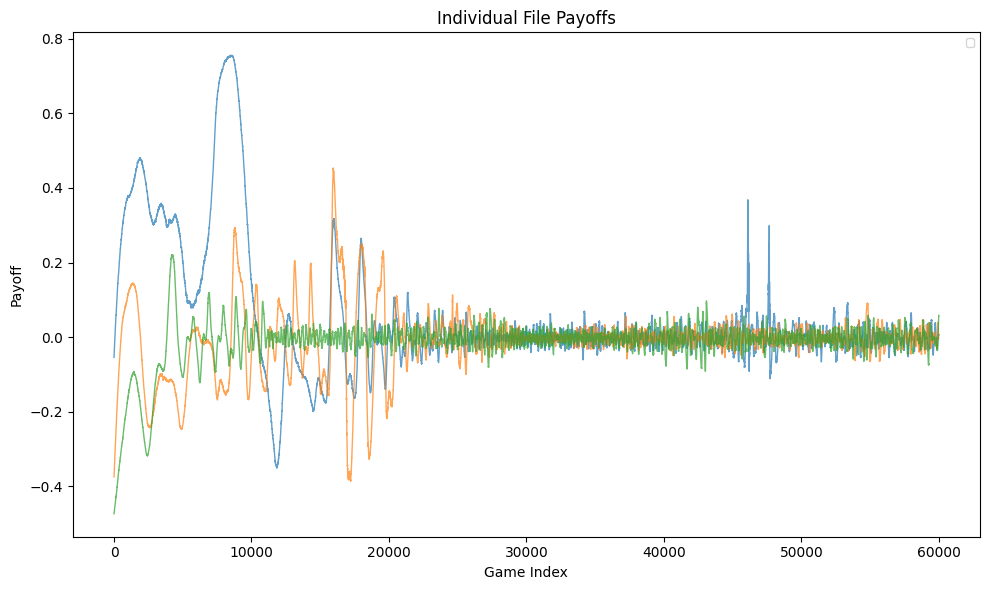

In [21]:
# Plot payoff data for individual files
plt.figure(figsize=(10, 6))

plt.title('Individual File Payoffs')
plt.xlabel('Game Index')
plt.ylabel('Payoff')
plt.legend(fontsize=8)

for filename, payoff_data in file_payoffs.items():
    plt.plot(payoff_data[:60000], alpha=0.7, label=filename[:20] + '...', linewidth=1)

plt.tight_layout()
plt.show()

In [16]:
t.stack(data["history"]["actions"][-1]).abs()

tensor([[0.9656, 0.0325, 0.2562, 0.0160, 0.0269],
        [0.6868, 0.0181, 0.0097, 0.0142, 0.7265],
        [0.9657, 0.0315, 0.2566, 0.0148, 0.0185]])